# Who deports more, Republicans or Democrats?


LIS MASc  
Everything Counts  
Assessment 2  
Student number: 24000114067

Access notebook online [here](https://github.com/noah-art3mis/stats-assignment-2)

PDF generated using [nbconvert](https://nbconvert.readthedocs.io/en/latest/index.html)


## Introduction


Less than a month ago, Trump won the United States election. A surprising contingent of black and latino citizens voted for him. The explanation seems to be "the economy" $-$ prices are rising and the ones in power happen to be the Democrats, and so they are being blamed for it ([Debusmann, Halpert & Wendling, 2024](https://www.bbc.co.uk/news/articles/cze3yr77j9wo)). People are voting for Trump $-$ despite his personality and beliefs $-$ because he is not a Democrat.

There are, however, other explanations. One of them, having come to my attention through a Mexican friend, is that the Democrats deport more than the Republicans. This would make it interesting for Mexicans to vote for Trump, even though he is racist ([Thomas & Wendling, 2024](https://www.bbc.co.uk/news/articles/c77l28myezko)) and one of the central points in his campaign is a suggestion of mass deportation ([Chishti & Bush-Joseph, 2024](https://www.migrationpolicy.org/article/biden-deportation-record)).

It this is the case, it would also suggest that people care more about material results than the morality of voting for someone who will promote hate against your ethnicity.
Understanding this phenomenon would help us understand the types of motivation involved in voting: rationality of behaviour, the weight of the voters' personal situation compared to ideological disputes, and so on. This might also suggest that Trump's rhetoric is less important than the results he delivers.

Is this supported by the data? Or is it the same case as the economy - that in much the same way that it _feels_ that the Democrats are to blame for inflation, it simply _feels_ that they are deporting more?

Unauthorized immigration is quite a complicated problem. It is also interdisciplinary, being related politics (election rhetoric), diplomacy (US-Mexico relationship), morality and law (deportation of criminals), racism and geopolitical inequality, resource distribution in public policy and so on. While this is not motivated by academic literature, it is motivated by current events. In fact, I would argue that a better understanding of this subject is extremely important.


## Influential factors

### Empirical

Being a very simple dataset, our analysis cannot account for a lot of factors which influence this issue. The first step is the complexity of the the word 'deport' itself. As a primer:

-   _deportation_ is a colloquial term;
-   _repatriation_ is an umbrella term for expulsions, returns, and removals;
-   _expulsion_ is a special type of removal introduced during the Covid-19 pandemic that bypasses usual immigration and asylum-seeking procedures;
-   _removal_ is enforced repatriation based on a formal order of removal;
-   _return_ is the departure of a noncitizen "who has been granted voluntary departure or allowed to withdraw their application for admission at the border..." ([Chishti and Bush-Joseph, 2024](https://www.migrationpolicy.org/article/biden-deportation-record))
    -   Around 90% of repatriations are returns. They usually happen on the borders.

Other confounding factors include ([Chishti and Bush-Joseph, 2024](https://www.migrationpolicy.org/article/biden-deportation-record)):

-   Demographic shift in migrant arrivals;
-   A threefold increase in the number of immigrants;
-   Lack of funding and staff for the US immigration agencies;
-   The difference between interior enforcement and border enforcement and how Biden shifted from the former to the latter;
-   Decreased cost of returns in comparison to removals;
-   Migrants try to emigrate repeatedly after failed attempts;
-   Logistical unfeasibility of mass deportation ([American Immigration Council, 2024](https://www.americanimmigrationcouncil.org/research/mass-deportation)).

All of these factors might generate some kind of bias that is unnacounted for in our analysis. This issue is complicated enough that we cannot make specific claims about causality. There are also global and events - such as the pandemic - that might influence immigration rates in complex ways.


### Normative

This is a controversial topic. As such, bias and confusion is to be expected.

> Whereas President Barack Obama was labeled by some as the “deporter in chief,” this new trend may earn President Joe Biden the title of “returner in chief.” Notably, authorities have deported migrants to more than 170 countries during the current administration, which may be the most ever. ([Chishti & Bush-Joseph, 2024](https://www.migrationpolicy.org/article/biden-deportation-record))

> Although detainer usage under the Biden administration has been rising, overall 50 percent more ICE detainers were issued during the Trump presidency (FY 2017 - FY 2020) ([Chishti & Bush-Joseph, 2024](https://www.migrationpolicy.org/article/biden-deportation-record))

All of this makes it very difficult to answer simple questions such as which administration deports more immigrants. As showcased by the quotes above, there are ways to argue for both. Even if we want to answer this in an objective, empirical, data-oriented manner, the data we have come from sources which have interests which might compromise our analysis. Nevertheless, we shall try.


## Data sources

Office of Homeland Security data (deportation, table 39): https://ohss.dhs.gov/topics/immigration/yearbook/2022

US House of Representatives History data (parties): https://history.house.gov/Institution/Presidents-Coinciding/Party-Government/

Statista UN demographic data (population): https://www.statista.com/statistics/1067138/population-united-states-historical/

World Bank (population): https://data.worldbank.org/indicator/SP.POP.TOTL?end=2023&locations=US&start=1960&view=chart


## Feature explanation


-   **Removals** are the compulsory and confirmed movement of an inadmissible or deportable noncitizen out of the United States based on an order of removal. A noncitizen who is removed has administrative or criminal consequences placed on subsequent reentry owing to the fact of the removal.
-   **Returns** are the confirmed movement of an inadmissible or deportable noncitizen out of the United States not based on an order of removal.
    -   While there are differences between administrative returns and enforcement returns, we will consider them as the same category. Returns reports start in 1927.
-   **Expulsions** on public health grounds under U.S. Code Title 42 in response to the COVID-19 pandemic. A [controversial](https://en.wikipedia.org/wiki/Title_42_expulsion) measure.
-   A **unified government** is when the President's party holds the majority in both chambers.


## Data cleaning


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.weightstats as st
import pingouin as pg

pd.set_option("display.max_colwidth", None)

plt.style.use("ggplot")

# these are the colors google uses for their election visualizations
gop_red = "#cf2035"
dem_blue = "#4d64ff"
custom_colors = sns.color_palette([dem_blue, gop_red])

In [2]:
df = pd.read_csv("data/party.csv")
df.head()

,Congress,House Majority,Senate Majority,Presidency,Party Government
0,35th (1857–1859),Democrats,Democrats,Democrat (Buchanan),Unified
1,36th (1859–1861),Republicans,Democrats,Democrat (Buchanan),Divided
2,37th (1861–1863),Republicans,Republicans,Republican (Lincoln),Unified
3,38th (1863–1865),Republicans,Republicans,Republican (Lincoln),Unified
4,39th (1865–1867),Republicans,Republicans,Republican (Lincoln) / Democrat (A. Johnson),Unified / Divided


In [3]:
df.columns.to_list()

['Congress',
 'House Majority',
 'Senate Majority',
 'Presidency',
 'Party Government']

In [4]:
# rename columns
df = df.rename(
    columns={
        "Congress": "congress",
        "House Majority": "house_majority",
        "Senate Majority": "senate_majority",
        "Presidency": "presidency",
        "Party Government": "government",
    }
)

df.iloc[0]

congress               35th (1857–1859)
house_majority                Democrats
senate_majority               Democrats
presidency         Democrat (Buchanan) 
government                      Unified
Name: 0, dtype: object

### Missing values


In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   congress         84 non-null     object
 1   house_majority   84 non-null     object
 2   senate_majority  84 non-null     object
 3   presidency       84 non-null     object
 4   government       84 non-null     object
dtypes: object(5)
memory usage: 32.2 KB


There are no missing values.


### Modifying features


#### Presidency


We move the president's name to another variable so the `presidency` feature can become a category.


In [6]:
df[["presidency", "president"]] = df["presidency"].str.extract(r"(.*)(\(.*\))")
df["president"] = df["president"].str.strip("()")
df.head()

,congress,house_majority,senate_majority,presidency,government,president
0,35th (1857–1859),Democrats,Democrats,Democrat,Unified,Buchanan
1,36th (1859–1861),Republicans,Democrats,Democrat,Divided,Buchanan
2,37th (1861–1863),Republicans,Republicans,Republican,Unified,Lincoln
3,38th (1863–1865),Republicans,Republicans,Republican,Unified,Lincoln
4,39th (1865–1867),Republicans,Republicans,Republican (Lincoln) / Democrat,Unified / Divided,A. Johnson


In [7]:
df["presidency"] = df["presidency"].astype("category")

#### Congress


In a similar but more involved way, we extract the years from the congress feature. The point is to have one row per year so that we can fit the two tables together.

We assume that if the 35th congress spans 1857-1859 and the 36th spans 1859-1861, the end result should be:

| Year | Congress |
| ---- | -------- |
| 1857 | 35th     |
| 1858 | 35th     |
| 1859 | 36th     |
| 1860 | 36th     |


In [8]:
df[["congress", "year_start", "year_end"]] = df["congress"].str.extract(
    r"^(\d*)\w{2} \((.*)–(.*)\)"
)
df.iloc[0]

congress                  35
house_majority     Democrats
senate_majority    Democrats
presidency         Democrat 
government           Unified
president           Buchanan
year_start              1857
year_end                1859
Name: 0, dtype: object

In [9]:
new_rows = []
for k, v in df.iterrows():
    for i in range(int(v["year_start"]), int(v["year_end"])):
        new_row = v.copy()
        new_row["year"] = i
        new_rows.append(new_row)

df = pd.DataFrame(new_rows)
df = df.drop(columns=["year_start", "year_end"])

In [10]:
df.sort_values(by="year")

,congress,house_majority,senate_majority,presidency,government,president,year
0,35,Democrats,Democrats,Democrat,Unified,Buchanan,1857
0,35,Democrats,Democrats,Democrat,Unified,Buchanan,1858
1,36,Republicans,Democrats,Democrat,Divided,Buchanan,1859
1,36,Republicans,Democrats,Democrat,Divided,Buchanan,1860
2,37,Republicans,Republicans,Republican,Unified,Lincoln,1861
...,...,...,...,...,...,...,...
81,116,Democrats,Republicans,Republican,Divided,Trump,2020
82,117,Democrats,Democrats,Democrat,Unified,Biden,2021
82,117,Democrats,Democrats,Democrat,Unified,Biden,2022
83,118,Republicans,Democrats,Democrat,Divided,Biden,2023


### Categories


When presidents resign or die, sometimes the vice-president is from the other party. Because of this complexity, we are dropping these cases. We keep the ones in which the two presidents are of the same party, as this shouldn't interfere with the analysis. This makes for very neat categories.


In [11]:
df["house_majority"].value_counts()

house_majority
Democrats      94
Republicans    74
Name: count, dtype: int64

In [12]:
df["government"].value_counts()

government
Unified              92
Divided              72
Unified / Divided     4
Name: count, dtype: int64

In [13]:
df.loc[df["government"] == "Unified / Divided"]

,congress,house_majority,senate_majority,presidency,government,president,year
4,39,Republicans,Republicans,Republican (Lincoln) / Democrat,Unified / Divided,A. Johnson,1865
4,39,Republicans,Republicans,Republican (Lincoln) / Democrat,Unified / Divided,A. Johnson,1866
72,107,Republicans,Republicans / Democrats,Republican,Unified / Divided,G.W. Bush,2001
72,107,Republicans,Republicans / Democrats,Republican,Unified / Divided,G.W. Bush,2002


In [14]:
complicated = df["government"] == "Unified / Divided"
df = df[~complicated]

In [15]:
df["government"].value_counts()

government
Unified    92
Divided    72
Name: count, dtype: int64

In [16]:
df["senate_majority"].value_counts()

senate_majority
Republicans    86
Democrats      78
Name: count, dtype: int64

In [17]:
category_cols = ["house_majority", "senate_majority", "government", "presidency"]

df[category_cols] = df[category_cols].astype("category")

In [18]:
df["congress"] = df["congress"].astype("int")

Now we have nice columns and categories to group our numerical data by.


#### Rename categories


We change 'Democrats' to 'Democrat' so all categories between columns are standardized.


In [19]:
df["house_majority"] = df["house_majority"].cat.rename_categories(
    {
        "Democrats": "Democrat",
        "Republicans": "Republican",
    }
)
df["house_majority"].cat.categories

Index(['Democrat', 'Republican'], dtype='object')

In [20]:
df["senate_majority"] = df["senate_majority"].cat.rename_categories(
    {
        "Democrats": "Democrat",
        "Republicans": "Republican",
    }
)
df["senate_majority"].cat.categories

Index(['Democrat', 'Republican'], dtype='object')

In [21]:
df["presidency"] = df["presidency"].cat.rename_categories(
    {
        "Democrat ": "Democrat",
        "Republican ": "Republican",
    }
)
df["presidency"].cat.categories

Index(['Democrat', 'Republican'], dtype='object')

In [22]:
df["government"].cat.categories

Index(['Divided', 'Unified'], dtype='object')

### Adding deportation data


Here we get the deportation data and join it with the dataframe. This is why it was critical to generate the year feature.


In [23]:
import numpy as np

df2 = pd.read_csv("data/yearbook_2022.csv")
df2

,year,removals,returns_adm,returns_enf,expulsions
0,1892,"2,801",X,X,X
1,1893,"1,630",X,X,X
2,1894,"1,806",X,X,X
3,1895,"2,596",X,X,X
4,1896,"3,037",X,X,X
...,...,...,...,...,...
126,2018,"327,608","72,756","87,202",X
127,2019,"347,090","89,719","81,401",X
128,2020,"237,364","113,857","53,595","206,770"
129,2021,"85,783","128,339","49,664","1,071,074"


In [24]:
df2 = df2.applymap(lambda x: "0" if x == "X" else x)
df2

/tmp/ipykernel_368031/2681203821.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: "0" if x == "X" else x)


,year,removals,returns_adm,returns_enf,expulsions
0,1892,"2,801",0,0,0
1,1893,"1,630",0,0,0
2,1894,"1,806",0,0,0
3,1895,"2,596",0,0,0
4,1896,"3,037",0,0,0
...,...,...,...,...,...
126,2018,"327,608","72,756","87,202",0
127,2019,"347,090","89,719","81,401",0
128,2020,"237,364","113,857","53,595","206,770"
129,2021,"85,783","128,339","49,664","1,071,074"


In [25]:
to_change = ["removals", "returns_adm", "returns_enf", "expulsions"]

for col in to_change:
    df2[col] = df2[col].str.replace(",", "")
    df2[col] = df2[col].astype("float")

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         131 non-null    int64  
 1   removals     131 non-null    float64
 2   returns_adm  131 non-null    float64
 3   returns_enf  131 non-null    float64
 4   expulsions   131 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.2 KB


In [26]:
df2

,year,removals,returns_adm,returns_enf,expulsions
0,1892,2801.0,0.0,0.0,0.0
1,1893,1630.0,0.0,0.0,0.0
2,1894,1806.0,0.0,0.0,0.0
3,1895,2596.0,0.0,0.0,0.0
4,1896,3037.0,0.0,0.0,0.0
...,...,...,...,...,...
126,2018,327608.0,72756.0,87202.0,0.0
127,2019,347090.0,89719.0,81401.0,0.0
128,2020,237364.0,113857.0,53595.0,206770.0
129,2021,85783.0,128339.0,49664.0,1071074.0


We also collapse the administrative returns and enforced returns into one `returns` category, since this distinction does not matter for our analysis.


In [27]:
df2["returns"] = df2["returns_adm"] + df2["returns_enf"]
df2["returns"]

df2 = df2.drop(columns=["returns_adm", "returns_enf"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        131 non-null    int64  
 1   removals    131 non-null    float64
 2   expulsions  131 non-null    float64
 3   returns     131 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.2 KB


In [28]:
df2["year"] = df2["year"].astype("int")

In [29]:
df = pd.merge(df, df2, on="year")
df.head()

,congress,house_majority,senate_majority,presidency,government,president,year,removals,expulsions,returns
0,52,Democrat,Republican,Republican,Divided,Harrison,1892,2801.0,0.0,0.0
1,53,Democrat,Democrat,Democrat,Unified,Cleveland,1893,1630.0,0.0,0.0
2,53,Democrat,Democrat,Democrat,Unified,Cleveland,1894,1806.0,0.0,0.0
3,54,Republican,Republican,Democrat,Divided,Cleveland,1895,2596.0,0.0,0.0
4,54,Republican,Republican,Democrat,Divided,Cleveland,1896,3037.0,0.0,0.0


In [30]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   congress         129 non-null    int64   
 1   house_majority   129 non-null    category
 2   senate_majority  129 non-null    category
 3   presidency       129 non-null    category
 4   government       129 non-null    category
 5   president        129 non-null    object  
 6   year             129 non-null    int64   
 7   removals         129 non-null    float64 
 8   expulsions       129 non-null    float64 
 9   returns          129 non-null    float64 
dtypes: category(4), float64(3), int64(2), object(1)
memory usage: 14.9 KB


### Adding population data


Comparing the absolute values of deportation might be meaningless since the population of the country changes with time. The new governments might have higher absolute numbers of deportation cases simply because they have more people. Because of this, we create adjusted metrics that account for the population growth.


In [31]:
df3 = pd.read_csv("data/population.csv")
df3

,year,population
0,1800,"6,000"
1,1801,"6,110"
2,1802,"6,230"
3,1803,"6,350"
4,1804,"6,470"
...,...,...
219,2019,"329,064.92"
220,2020,"331,002.65"
221,2021,"332,048.97"
222,2022,"333,271.41"


In [32]:
df3["population"] = df3["population"].str.replace(",", "")
df3["population"] = df3["population"].astype("float")
df3["population"] = df3["population"] * 1000
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        224 non-null    int64  
 1   population  224 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.6 KB


In [33]:
df = pd.merge(df, df3, on="year")
df.tail()

,congress,house_majority,senate_majority,presidency,government,president,year,removals,expulsions,returns,population
124,115,Republican,Republican,Republican,Unified,Trump,2018,327608.0,0.0,159958.0,327096260.0
125,116,Democrat,Republican,Republican,Divided,Trump,2019,347090.0,0.0,171120.0,329064920.0
126,116,Democrat,Republican,Republican,Divided,Trump,2020,237364.0,206770.0,167452.0,331002650.0
127,117,Democrat,Democrat,Democrat,Unified,Biden,2021,85783.0,1071074.0,178003.0,332048970.0
128,117,Democrat,Democrat,Democrat,Unified,Biden,2022,108733.0,1103966.0,261387.0,333271410.0


In [34]:
df["removals_adj"] = df["removals"] / df["population"]
df["returns_adj"] = df["returns"] / df["population"]
df.tail()

,congress,house_majority,senate_majority,presidency,government,president,year,removals,expulsions,returns,population,removals_adj,returns_adj
124,115,Republican,Republican,Republican,Unified,Trump,2018,327608.0,0.0,159958.0,327096260.0,0.001002,0.000489
125,116,Democrat,Republican,Republican,Divided,Trump,2019,347090.0,0.0,171120.0,329064920.0,0.001055,0.000520
126,116,Democrat,Republican,Republican,Divided,Trump,2020,237364.0,206770.0,167452.0,331002650.0,0.000717,0.000506
127,117,Democrat,Democrat,Democrat,Unified,Biden,2021,85783.0,1071074.0,178003.0,332048970.0,0.000258,0.000536
128,117,Democrat,Democrat,Democrat,Unified,Biden,2022,108733.0,1103966.0,261387.0,333271410.0,0.000326,0.000784


Finally, we reorder the columns.


In [35]:
df.columns.to_list()

['congress',
 'house_majority',
 'senate_majority',
 'presidency',
 'government',
 'president',
 'year',
 'removals',
 'expulsions',
 'returns',
 'population',
 'removals_adj',
 'returns_adj']

In [36]:
df = df[
    [
        "year",
        "congress",
        "president",
        "presidency",
        "house_majority",
        "senate_majority",
        "government",
        "population",
        "removals",
        "removals_adj",
        "returns",
        "returns_adj",
        "expulsions",
    ]
]

In [37]:
df["year"] = pd.to_datetime(df["year"], format="%Y")
df["year"]

0     1892-01-01
1     1893-01-01
2     1894-01-01
3     1895-01-01
4     1896-01-01
         ...    
124   2018-01-01
125   2019-01-01
126   2020-01-01
127   2021-01-01
128   2022-01-01
Name: year, Length: 129, dtype: datetime64[ns]

In [38]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             129 non-null    datetime64[ns]
 1   congress         129 non-null    int64         
 2   president        129 non-null    object        
 3   presidency       129 non-null    category      
 4   house_majority   129 non-null    category      
 5   senate_majority  129 non-null    category      
 6   government       129 non-null    category      
 7   population       129 non-null    float64       
 8   removals         129 non-null    float64       
 9   removals_adj     129 non-null    float64       
 10  returns          129 non-null    float64       
 11  returns_adj      129 non-null    float64       
 12  expulsions       129 non-null    float64       
dtypes: category(4), datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 17.9 KB


## Descriptive statistics


In [39]:
recent = df.tail(20)

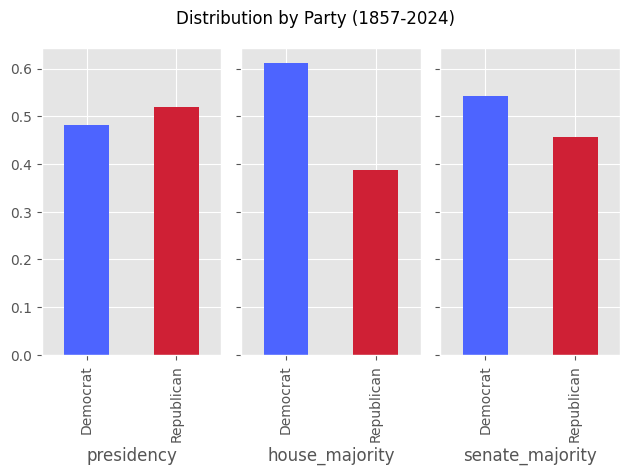

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)

df["presidency"].value_counts(normalize=True).sort_values().plot(
    ax=axes[0], kind="bar", stacked=True, ylabel="", color=custom_colors
)

df["house_majority"].value_counts(normalize=True).plot(
    ax=axes[1], kind="bar", stacked=True, ylabel="", color=custom_colors
)
df["senate_majority"].value_counts(normalize=True).plot(
    ax=axes[2], kind="bar", stacked=True, ylabel="", color=custom_colors
)

plt.suptitle("Distribution by Party (1857-2024)")
plt.tight_layout()

This plot shows the relative distribution of parties in the three variables. They show that no party became particularly prevalent through US history. There seems to be some preference for a Democrat majority in both house and senate, but this it is not extreme in a way that would compromise our analysis.


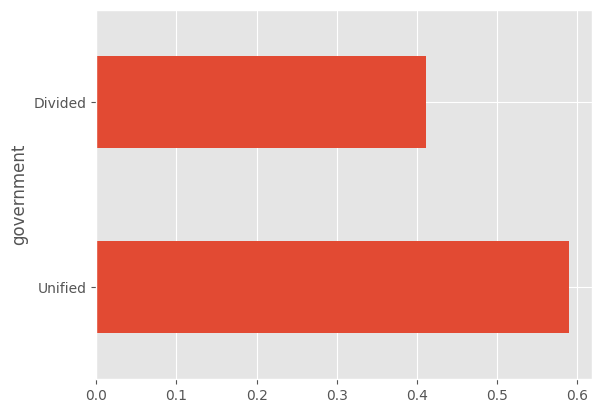

In [ ]:
df["government"].value_counts(normalize=True).plot.barh()

This one shows that the same is true for the divided/unified dimension.


This matters because if one party had 90% prevalence, it would be expected that they would be responsible for whatever situation the country was in. As it is, they seem to share the responsibility more or less equally; the same is true for divided and unified governments.


We now turn to describing repatriations in relation to time.


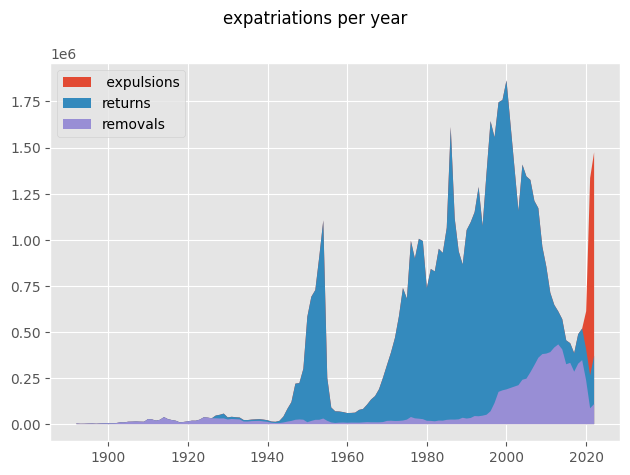

In [42]:
plt.fill_between(
    df["year"], df["expulsions"] + df["returns"] + df["removals"], label=" expulsions"
)
plt.fill_between(df["year"], df["returns"] + df["removals"], label="returns")
plt.fill_between(df["year"], df["removals"], label="removals")

plt.legend()
plt.suptitle("expatriations per year")
plt.tight_layout()

This plot shows the prevalence of removals and returns for the last 100 years. We can see a increase in removals after around 1990, accompanied by a decrease in returns. We have return spikes around 1950, 1985 and 2000. This might point to a change in the immigration policy in the US around the year 2000. This might be related to the terrorist attacks on 9/11/2001, although removals started to rise years before.

This plot suggests that the deportation rate in the US, right now, is actually much lower than it used to be around the year 2000.

Zooming into the latest 20 years, we get this:


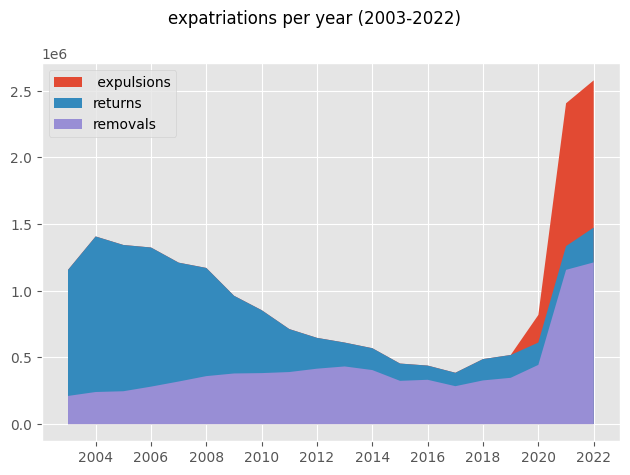

In [102]:
plt.fill_between(
    recent["year"],
    recent["expulsions"] + recent["returns"] + recent["removals"],
    label=" expulsions",
)
plt.fill_between(
    recent["year"], recent["returns"] + recent["removals"], label="returns"
)
plt.fill_between(recent["year"], recent["removals"], label="removals")

plt.legend()
plt.suptitle("expatriations per year (2003-2022)")
plt.tight_layout()

This plot shows how all kinds of deportations have increased after 2020. This might account for the feeling that Trump deported less.


As nice as this plot looks, this visualization might be misleading. The rates of immigration depend on several variables, one of which is the population of the country, which we can account for. (There might also be geopolitical events happening during those spikes, but this is out of scope for this project.). By using our adjusted metrics that account for the US population, we get this:


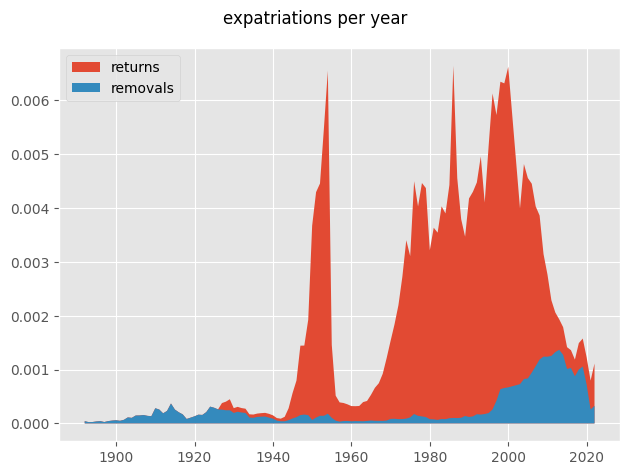

In [44]:
plt.fill_between(df["year"], df["returns_adj"] + df["removals_adj"], label="returns")
plt.fill_between(df["year"], df["removals_adj"], label="removals")

plt.legend()
plt.suptitle("expatriations per year")
plt.tight_layout()

The return spikes seem even sharper, and the removals before 2000 become more visible. More importantly, the graph keeps its shape, which suggests that population size was not responsible for any drastic changes. Mathematically, this might be because of the shape of the population increase curve, which seems to be almost a straight line:


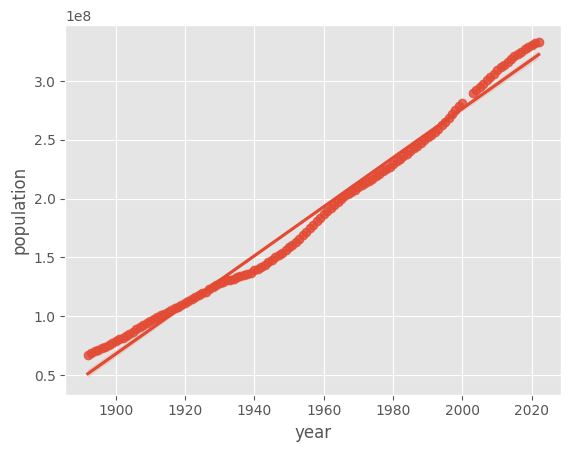

In [ ]:
sns.regplot(x=df["year"].dt.year, y=df["population"])

(I suspect this actually might be biased because the census happens only every 10 years, or something similar. In that case it the curve would look like this because of the interpolation of the values between the decade; this would depend on the kind of interpolation used by the data analyst in question.)


In [46]:
pg.corr(df["removals"], df["removals_adj"])

,n,r,CI95%,p-val,BF10,power
pearson,129,0.989384,"[0.98, 0.99]",2.950213e-108,5.828e+103,1.0


The adjusted metric has a 99% correlation with the original. This suggests the variation of the population size bears no particular interest. Thus, this line of inquiry is dropped. A more relevant measure might be the number of immigrants in the US (either absolute or relative), but this notebook is long enough as it is, so we reserve that consideration for future research.


For the next plots, we are considering expulsions as removals to aid in the simplicity of the visualizations. We can represent the party as a color in the plot through the seaborn `hue` property, which gives us the following plots:


In [47]:
simpl = df
simpl["removals"] = simpl["removals"] + simpl["expulsions"]

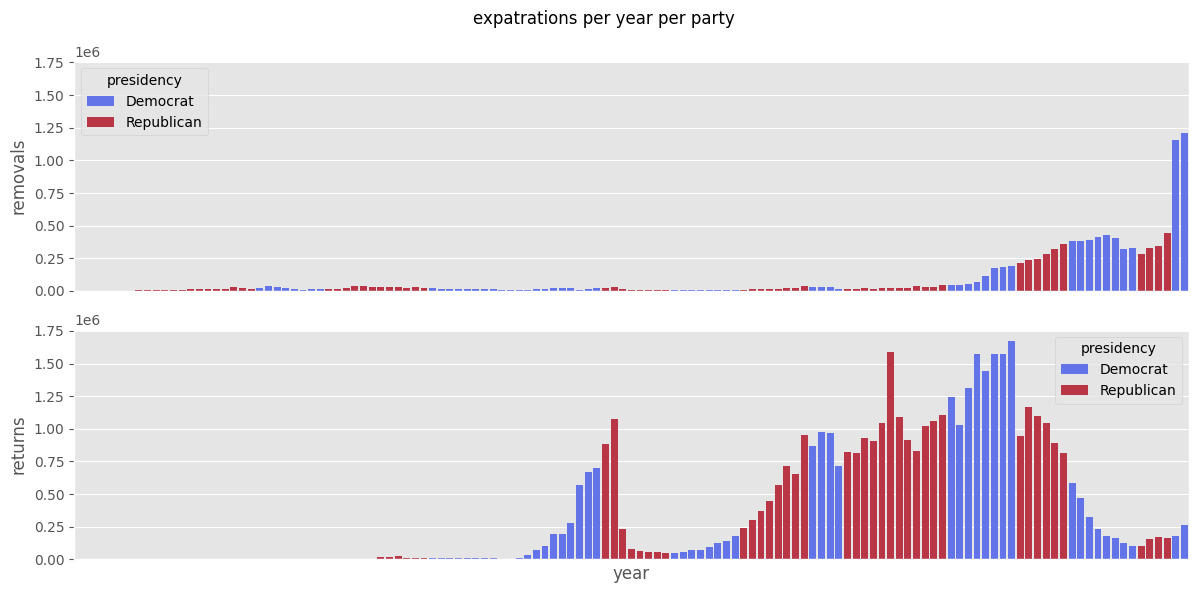

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))

sns.barplot(
    data=simpl,
    ax=axes[0],
    x="year",
    y="removals",
    hue="presidency",
    palette=custom_colors,
)

sns.barplot(
    data=simpl,
    ax=axes[1],
    x="year",
    y="returns",
    hue="presidency",
    palette=custom_colors,
)

plt.suptitle("expatrations per year per party")
plt.xticks([])
plt.tight_layout()

This plot shows the biggest spike in returns was in a democrat presidency, but the lead up to it was mostly republican.

It also shows that the increase in removals happened in a democrat government, but both parties seems to be on the same page after that.

The introduction of the expulsion policy during the pandemic was during Biden's administration.


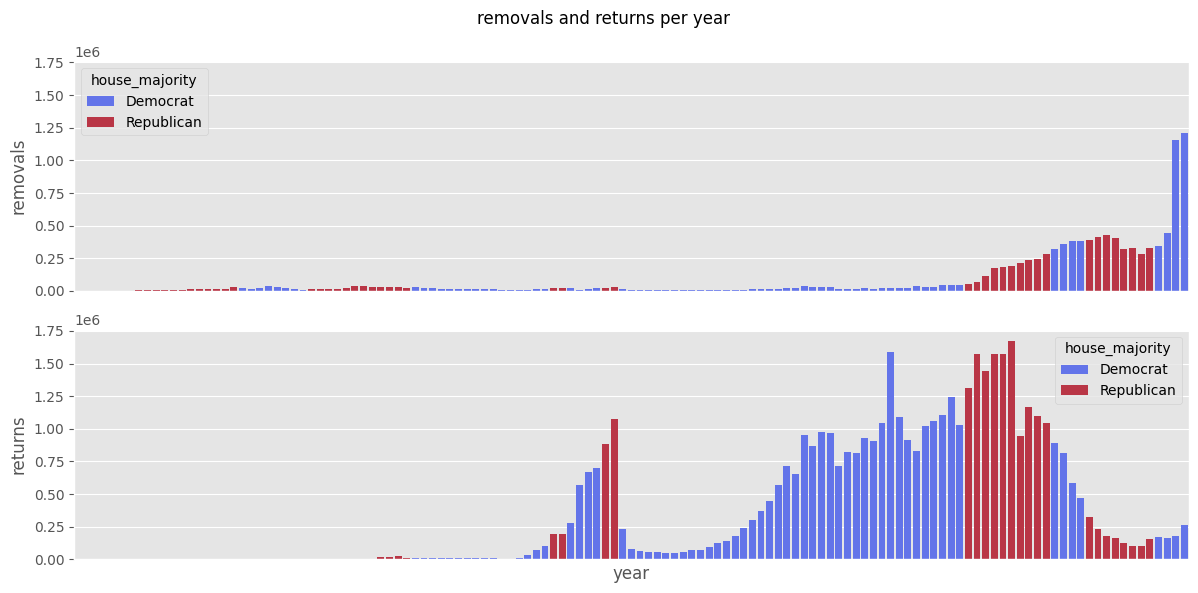

In [125]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))

sns.barplot(
    data=simpl,
    ax=axes[0],
    x="year",
    y="removals",
    hue="house_majority",
    palette=custom_colors,
)

sns.barplot(
    data=simpl,
    ax=axes[1],
    x="year",
    y="returns",
    hue="house_majority",
    palette=custom_colors,
)

plt.suptitle("removals and returns per year")
plt.xticks([])
plt.tight_layout()

This plot shows the same of what I described about the previous plot, but with the parties reversed.

This might suggest there is no particular responsibility to either the red or blue party on issue.


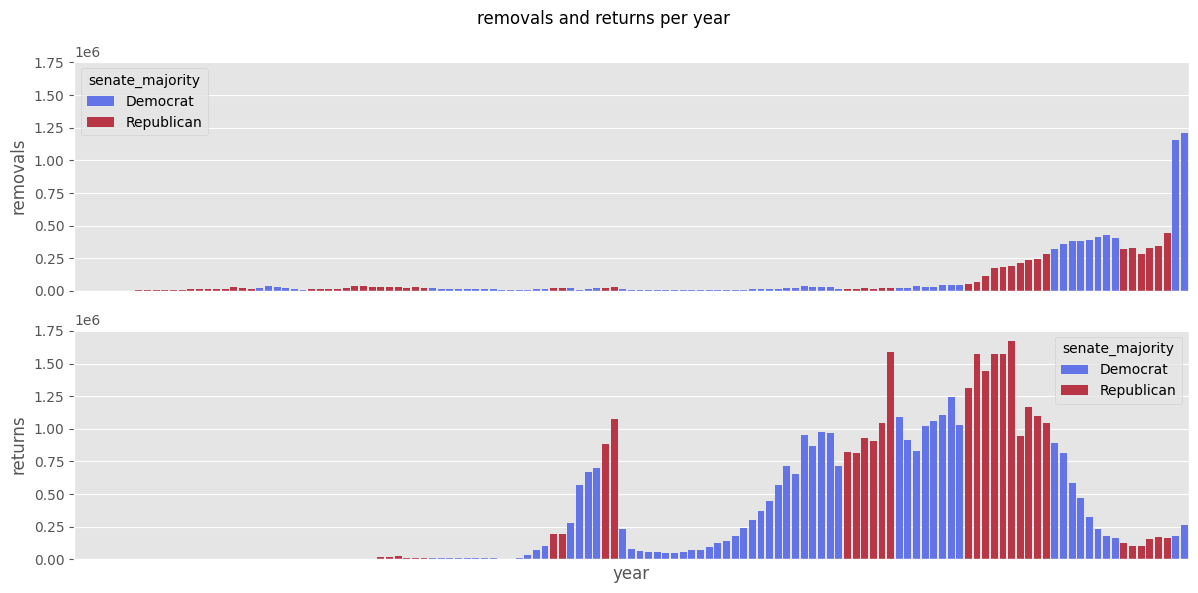

In [124]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))

sns.barplot(
    data=simpl,
    ax=axes[0],
    x="year",
    y="removals",
    hue="senate_majority",
    palette=custom_colors,
)

sns.barplot(
    data=simpl,
    ax=axes[1],
    x="year",
    y="returns",
    hue="senate_majority",
    palette=custom_colors,
)

plt.suptitle("removals and returns per year")
plt.xticks([])
plt.tight_layout()

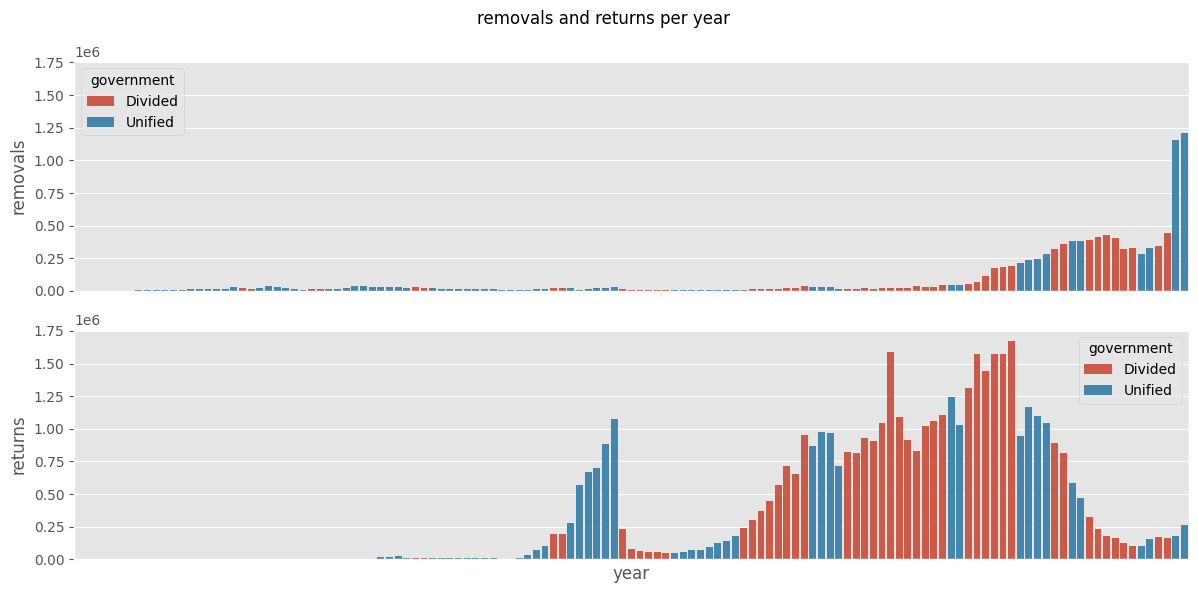

In [123]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))

sns.barplot(
    data=simpl,
    ax=axes[0],
    x="year",
    y="removals",
    hue="government",
)

sns.barplot(
    data=simpl,
    ax=axes[1],
    x="year",
    y="returns",
    hue="government",
)

plt.suptitle("removals and returns per year")
plt.xticks([])
plt.tight_layout()

These last two plots also do not suggest any particular relationship between the parties and the deportation numbers.


In [52]:
recent = simpl.tail(20)

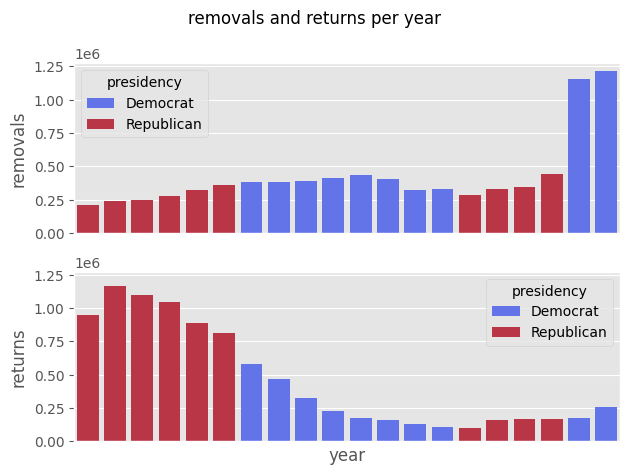

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)

sns.barplot(
    data=recent,
    ax=axes[0],
    x="year",
    y="removals",
    hue="presidency",
    palette=custom_colors,
)

sns.barplot(
    data=recent,
    ax=axes[1],
    x="year",
    y="returns",
    hue="presidency",
    palette=custom_colors,
)

plt.suptitle("removals and returns per year (2003-2022)")
plt.xticks([])
plt.tight_layout()

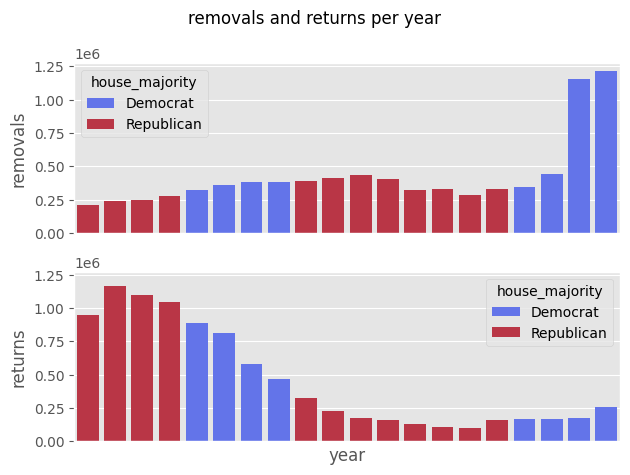

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)

sns.barplot(
    data=recent,
    ax=axes[0],
    x="year",
    y="removals",
    hue="house_majority",
    palette=custom_colors,
)

sns.barplot(
    data=recent,
    ax=axes[1],
    x="year",
    y="returns",
    hue="house_majority",
    palette=custom_colors,
)

plt.suptitle("removals and returns per year (2003-2022)")
plt.xticks([])
plt.tight_layout()

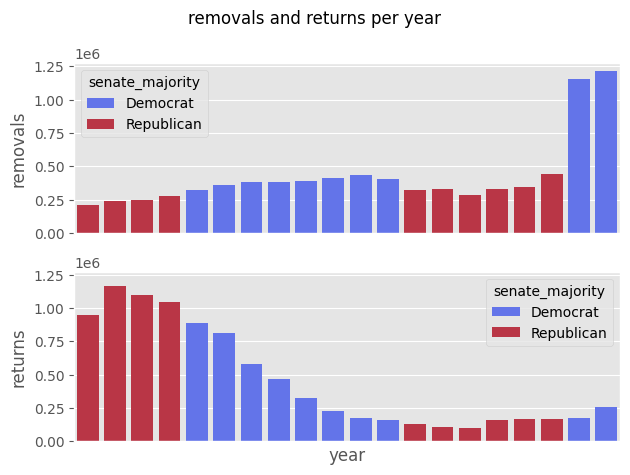

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)

sns.barplot(
    data=recent,
    ax=axes[0],
    x="year",
    y="removals",
    hue="senate_majority",
    palette=custom_colors,
)

sns.barplot(
    data=recent,
    ax=axes[1],
    x="year",
    y="returns",
    hue="senate_majority",
    palette=custom_colors,
)

plt.suptitle("removals and returns per year (2003-2022)")
plt.xticks([])
plt.tight_layout()

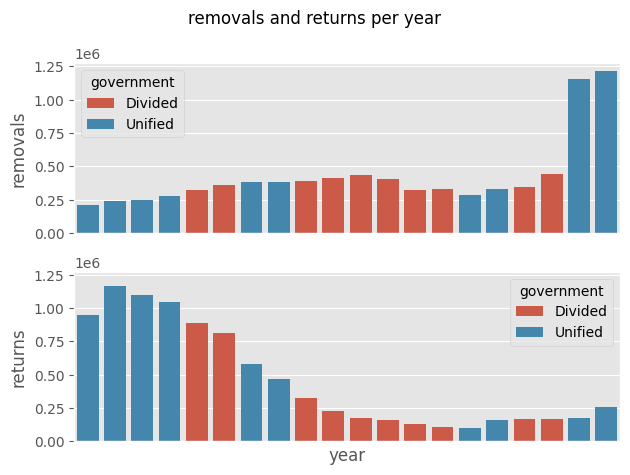

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)

sns.barplot(
    data=recent,
    ax=axes[0],
    x="year",
    y="removals",
    hue="government",
)

sns.barplot(
    data=recent,
    ax=axes[1],
    x="year",
    y="returns",
    hue="government",
)

plt.suptitle("removals and returns per year (2003-2022)")
plt.xticks([])
plt.tight_layout()

Looking at all these plots I do not get the impression that party has something to do with deportation numbers. They all seem to describe a bigger trend that transcends the boundaries of party affiliation.

The idea that democrats deport more might just be a reaction to the Title 42 policy of expulsions.


In [57]:
print(f'{df["removals"].sum():,} total removals')
print(f'{df["returns"].sum():,} total returns')
print(f'{df["returns"].sum() / df["removals"].sum():.2f}x more returns than removals')

11,124,096.0 total removals
46,831,216.0 total returns
4.21x more returns than removals


In [58]:
df[["removals", "returns"]].corr()

,removals,returns
removals,1.000000,0.102169
returns,0.102169,1.000000


Removals and returns have a low correlation, suggesting they are driven by different factors.


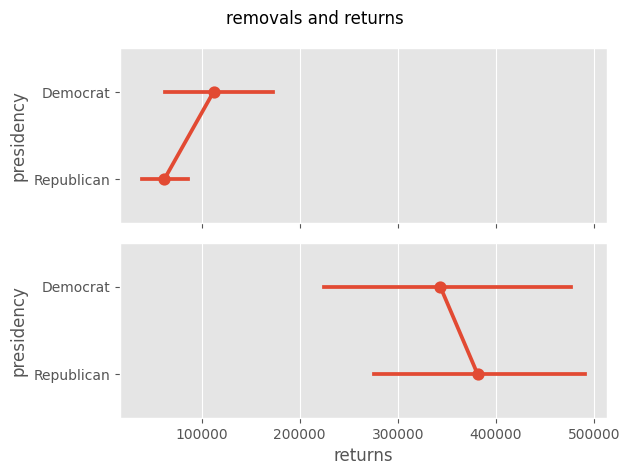

In [59]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)

sns.pointplot(data=df, ax=axes[0], x="removals", y="presidency")
sns.pointplot(data=df, ax=axes[1], x="returns", y="presidency")

plt.suptitle("removals and returns")
plt.tight_layout()

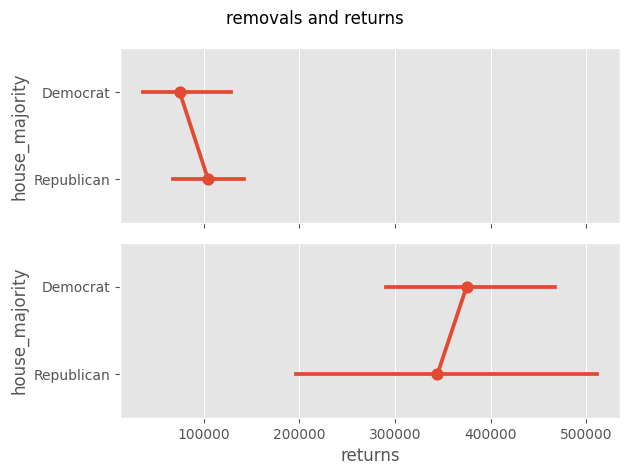

In [60]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
sns.pointplot(data=df, ax=axes[0], x="removals", y="house_majority")
sns.pointplot(data=df, ax=axes[1], x="returns", y="house_majority")
plt.suptitle("removals and returns")
plt.tight_layout()

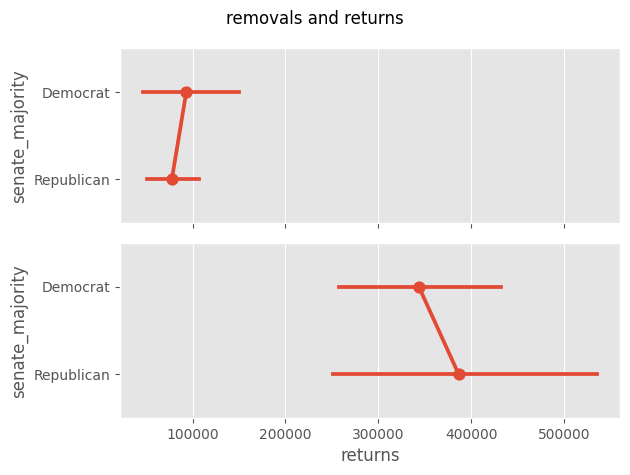

In [61]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
sns.pointplot(data=df, ax=axes[0], x="removals", y="senate_majority")
sns.pointplot(data=df, ax=axes[1], x="returns", y="senate_majority")
plt.suptitle("removals and returns")
plt.tight_layout()

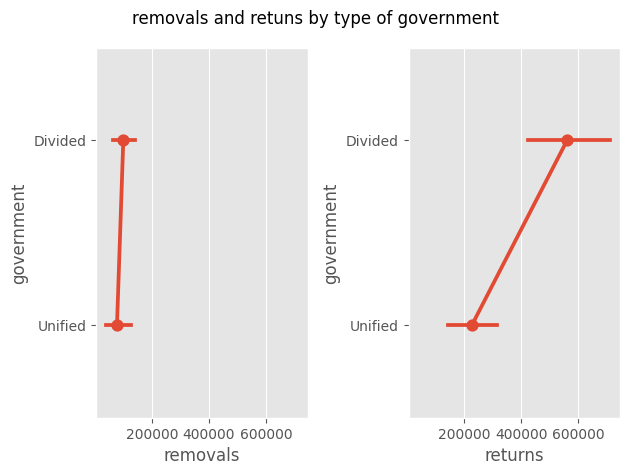

In [62]:
fig, axes = plt.subplots(1, 2, sharex=True)

sns.pointplot(data=df, ax=axes[0], x="removals", y="government")
sns.pointplot(data=df, ax=axes[1], x="returns", y="government")

plt.suptitle("removals and retuns by type of government")
plt.tight_layout()

All of these are inconclusive, besides the one that suggests that divided governments do more returns. I would still be skeptical of this, as the other plots strongly suggest long-range behaviour instead of short changes which would be responding to changes in government party.


## Inferential statistics


## Research question

The question we want to ask is if Trump deports less than Biden.

A simple answer to this would be _yes_, because Biden was the one in power when a large amount of expulsions happened - a measure to contain infection during the Covid-19 pandemic. If we don't discern between the different types of repatriatons, it is expected that this would be the case. We can illustrate this with the contrast between two plots:


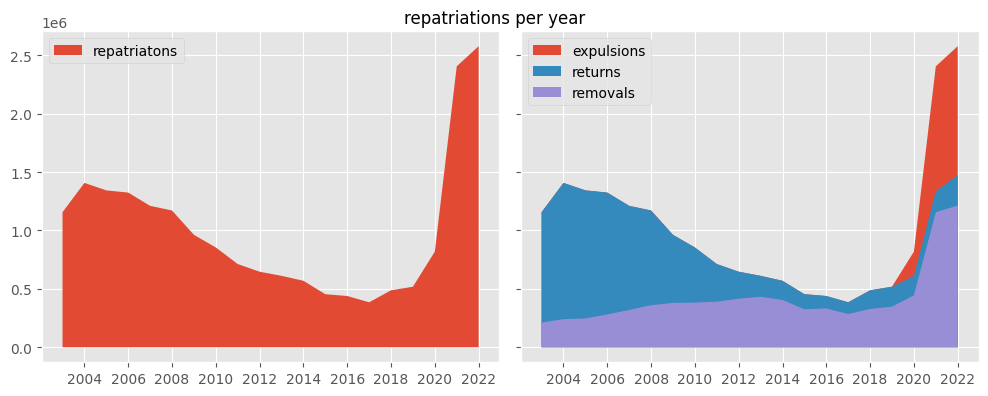

In [ ]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))

axs[0].fill_between(
    recent["year"],
    recent["expulsions"] + recent["returns"] + recent["removals"],
    label="repatriatons",
)

axs[1].fill_between(
    recent["year"],
    recent["expulsions"] + recent["returns"] + recent["removals"],
    label="expulsions",
)

axs[1].fill_between(
    recent["year"],
    recent["returns"] + recent["removals"],
    label="returns",
)

axs[1].fill_between(
    recent["year"],
    recent["removals"],
    label="removals",
)

axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.suptitle("repatriations per year")

As we can see, the proportions between the different types of repatriatons vary a lot across time. If we take them to be one unified phenomenon, we might get a wrong answer. You might even say that the first visualization is biased in this way.


/tmp/ipykernel_368031/2624828989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent["total"] = recent["expulsions"] + recent["returns"] + recent["removals"]


([], [])

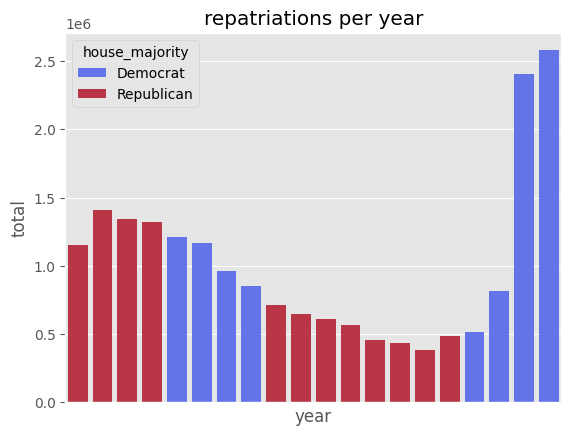

In [133]:
recent["total"] = recent["expulsions"] + recent["returns"] + recent["removals"]

sns.barplot(
    data=recent,
    x="year",
    y="total",
    hue="house_majority",
    palette=custom_colors,
)

plt.title("repatriations per year")
plt.xticks([])

Looking at this plot where the democrats have a huge spike, it would be reasonable to expect people's intuitions to be that democrats deport more.


While this sounds like an explanation for this specific instance of people feeling that Biden deports more than Trump, in the interest of science and explanation, we might want to ask a more general question. As such, we convert this problem into a precise research question:

_Is there a higher rate of deportation of undocumented immigrants in the US when the president is a Democrat?_

As established, we need to consider the different types of deportation separately.

This gives us a few sub-questions:

1. _Is there a higher rate of **deportations** of undocumented immigrants in the US when the **president** is a Democrat?_

1. _Is there a higher rate of **removals** of undocumented immigrants in the US when the **president** is a Democrat?_

1. _Is there a higher rate of **returns** of undocumented immigrants in the US when the **president** is a Democrat?_

Given the data available, we can also extend this to check if there are differences in means between party prevalence in the house and senate.

1. _Is there a higher rate of **removals** of undocumented immigrants in the US when the **house** is a Democrat?_

1. _Is there a higher rate of **returns** of undocumented immigrants in the US when the **house** is a Democrat?_

1. _Is there a higher rate of **removals** of undocumented immigrants in the US when the **senate** is a Democrat?_

1. _Is there a higher rate of **returns** of undocumented immigrants in the US when the **senate** is a Democrat?_

At this point, we have a lot of variables. With this amount of variables involved, one solution is to run a multiple linear regression. We can then estimate how these variables affect the repatriation data.

Since this might only apply as a short term analysis, we can also check this specifically in the last 20 years.

While these do not have a particular relationship with our original question, they seem to appear more relevant than the others when looking at the data. While it is good practice not to deviate from your original research question, I would argue that it would be irresponsible to ignore this finding as well. And so we also consider the goernment variable:

1. _Is there a higher rate of **removals** of undocumented immigrants in the US when the **government** is divided?_

1. _Is there a higher rate of **returns** of undocumented immigrants in the US when the **government** is divided?_


## Analysis

### Hypothesis

Taking, for example, the first question:

1. _Is there a higher rate of **deportations** of undocumented immigrants in the US when the **president** is a Democrat?_

This kind of question can answered by a $t$-test. Even though the question is structured in a one-tailed way, it would be more appropriate to do a two-tailed test. If we need to ask this question at all, it means we shouldn't trust any assumptions we have about which party deports more. By doing this, we get:

H<sub>0</sub>: x̄<sub>D</sub> − x̄<sub>R</sub> = 0

H<sub>A</sub>: x̄<sub>D</sub> − x̄<sub>R</sub> ≠ 0


### Assumptions:

The t-test depends on the assumption that the data normally distributed. We can check this using histograms and Q-Q plots.


<Axes: >

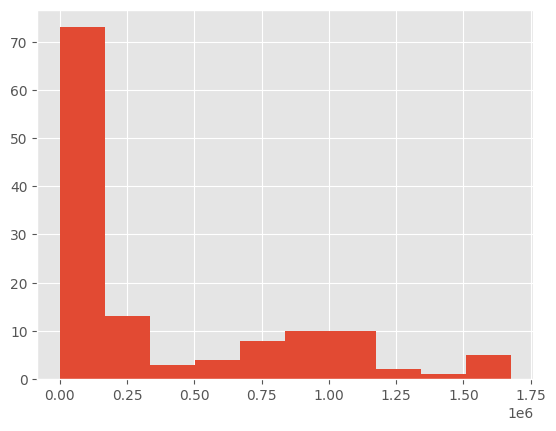

In [65]:
df["returns"].hist()

<Axes: >

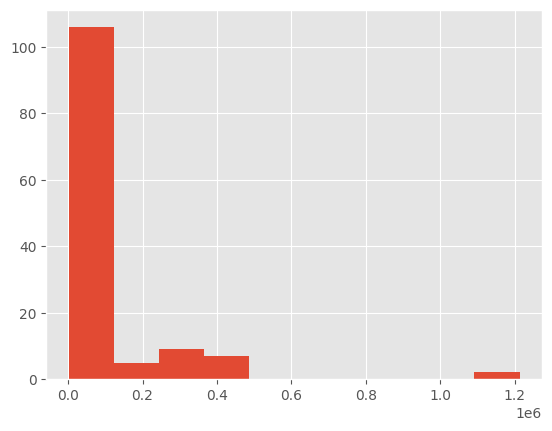

In [66]:
df["removals"].hist()

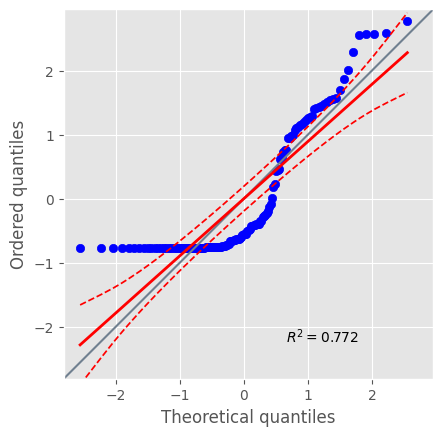

In [ ]:
pg.qqplot(df["returns"])

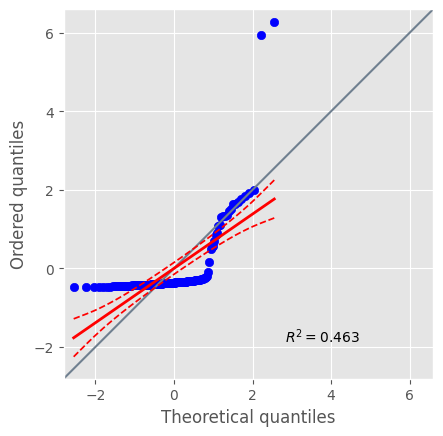

In [ ]:
pg.qqplot(df["removals"])

In [69]:
pg.normality(df["removals"])

,W,pval,normal
removals,0.47284,1.499622e-19,False


In [70]:
pg.normality(df["returns"])

,W,pval,normal
returns,0.767174,4.990930e-13,False


These distributions are not normal. The histograms do not look like a normal distribution, the QQ plots do not follow the 45 degree line and the normality function in pingouin returns false.

A way to deal with this is using a non-parametric function (meaning that it does not assume normality), such as the [Wilcoxon](https://ethanweed.github.io/pythonbook/05.02-ttest.html#two-sample-wilcoxon-test) test. But since the Wilcoxon is for paired samples, we can use the one called [Mann-Whitney](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) U, which a non-parametric, independent-samples version of it. But since Mann-Whitney U compares distributions and medians instead of means, I don't know if it is appropriate.

Because of this, we will be using the humble $t$-test.


#### Explanation of procedure

We will answer the first question in detail, and repeat the procedure for all others.

We want to compare the numbers of repatriations of US undocumented immigrants between two levels of a categorical feature: `presidency`, which can be `Democrat` or `Republican`. We can do this by comparing the means of two groups using a $t$-test. We take deportation, in that question, to mean all types of repatriation.


In [71]:
df["repatriations"] = df["removals"] + df["returns"] + df["expulsions"]
df[["removals", "returns", "expulsions", "repatriations"]]

,removals,returns,expulsions,repatriations
0,2801.0,0.0,0.0,2801.0
1,1630.0,0.0,0.0,1630.0
2,1806.0,0.0,0.0,1806.0
3,2596.0,0.0,0.0,2596.0
4,3037.0,0.0,0.0,3037.0
...,...,...,...,...
124,327608.0,159958.0,0.0,487566.0
125,347090.0,171120.0,0.0,518210.0
126,444134.0,167452.0,206770.0,818356.0
127,1156857.0,178003.0,1071074.0,2405934.0


#### $t$-test (Student)


In [72]:
repatriations_presidency_dems = df["repatriations"][df["presidency"] == "Democrat"]
repatriations_presidency_reps = df["repatriations"][df["presidency"] != "Democrat"]

cm = st.CompareMeans(
    st.DescrStatsW(repatriations_presidency_dems),
    st.DescrStatsW(repatriations_presidency_reps),
)

cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,4.42e+04,1.01e+05,0.438,0.662,-1.56e+05,2.44e+05


The results of this test are not statistically discernible. This is because `p > 0.05` and the confidence interval intersects zero. Because of this, we do not reject the null hypothesis (which asserts that the means of the repatriations in the different conditions are the same).


#### $t$-test (Welch)

Even $t$-tests are not created equal. `statsmodels` uses a Student's t-test. A more appropriate test might be a [Welch](https://ethanweed.github.io/pythonbook/05.02-ttest.html#id15) test (which 'corrects for unequal variances' as per the documentation).


In [73]:
pg.ttest(
    repatriations_presidency_dems,
    repatriations_presidency_reps,
    correction=True,  # Welch
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.433229,113.817195,two-sided,0.665668,"[-157920.18, 246324.06]",0.077139,0.205,0.071888


This gives us a similar non-statistically-significant answer (p = 0.66).


Now we perform similar analyses for other questions:


##### Repatriations / House


In [74]:
pg.ttest(
    df["repatriations"][df["house_majority"] == "Democrat"],
    df["repatriations"][df["house_majority"] != "Democrat"],
    correction=True,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.292043,97.216339,two-sided,0.770876,"[-179047.75, 240832.97]",0.053891,0.2,0.060093


##### Repatriations / Senate


In [75]:
pg.ttest(
    df["repatriations"][df["senate_majority"] == "Democrat"],
    df["repatriations"][df["senate_majority"] != "Democrat"],
    correction=True,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.00348,117.7823,two-sided,0.997229,"[-202225.16, 202937.2]",0.000621,0.189,0.050001


##### Repatriations / Government


In [76]:
pg.ttest(
    df["repatriations"][df["government"] == "Divided"],
    df["repatriations"][df["government"] != "Divided"],
    correction=True,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.379035,112.6517,two-sided,0.001,"[137204.58, 526156.39]",0.603762,29.387,0.91746


This is the first statistically significant test we have:`p < 0.05, CI [137k, 526k]`. Pingouin also gives us the effect size measure Cohen's $d$ = 0.6. Because of this, we reject the null hypothesis which suggests that there is no difference between the means of deportations of governments which are divided or united.


##### Returns / Gov


In [77]:
pg.ttest(
    df["returns"][df["government"] == "Divided"],
    df["returns"][df["government"] != "Divided"],
    correction=True,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.940372,86.955193,two-sided,0.000164,"[165631.7, 502810.93]",0.749292,167.214,0.985924


##### Removals / Gov


In [78]:
pg.ttest(
    df["removals"][df["government"] == "Divided"],
    df["removals"][df["government"] != "Divided"],
    correction=True,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.728065,126.993684,two-sided,0.467914,"[-38097.93, 82451.51]",0.122524,0.243,0.104341


##### Expulsions / Gov


In [158]:
pg.ttest(
    df["expulsions"][df["government"] == "Divided"],
    df["expulsions"][df["government"] != "Divided"],
    correction=True,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.206992,80.59043,two-sided,0.230966,"[-65466.95, 16031.69]",0.181877,0.369,0.172216


This analysis also suggests that while the difference is statistically significant regarding returns, it is not so regarding removals. Because of this, we reject the null hypothesis.

Governments which are divided return more undocumented immigrants.


#### Multiple linear regression


In [79]:
dfr = df.copy()

First, we one-hot encode the categories so the regression function can accept its values.


In [80]:
dfr["government"] = dfr["government"].map({"Unified": 1, "Divided": 0})
dfr["government"] = dfr["government"].astype("int")

dfr["presidency"] = dfr["presidency"].map({"Democrat": 1, "Republican": 0})
dfr["presidency"] = dfr["presidency"].astype("int")

dfr["house_majority"] = dfr["house_majority"].map({"Democrat": 1, "Republican": 0})
dfr["house_majority"] = dfr["house_majority"].astype("int")

dfr["senate_majority"] = dfr["senate_majority"].map({"Democrat": 1, "Republican": 0})
dfr["senate_majority"] = dfr["senate_majority"].astype("int")

dfr.dtypes

year               datetime64[ns]
congress                    int64
president                  object
presidency                  int64
house_majority              int64
senate_majority             int64
government                  int64
population                float64
removals                  float64
removals_adj              float64
returns                   float64
returns_adj               float64
expulsions                float64
repatriations             float64
dtype: object

In [81]:
pg.linear_regression(dfr["government"], dfr["returns"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,559938.264151,61269.614649,9.138923,1.280490e-15,0.121295,0.114376,438696.75380,681179.774502
1,government,-334221.316783,79823.948773,-4.186980,5.243489e-05,0.121295,0.114376,-492178.50595,-176264.127615


This result is statistically discernible because p < 0.05. The $R^2$ value indicates that government accounts for around 12% of the variation of the `returns` variable.

This model confirms our previous analysis: government and returns are correlated. The sign in the coefficient also points to the direction of the relationship. These variables are negatively correlated. Since we encoded `united` as 1 and `divided` as 0, this means that **a united government has less returns than a divided government**.


In [82]:
pg.linear_regression(
    dfr[["government", "presidency", "house_majority", "senate_majority"]],
    dfr["returns"],
    relimp=True,
).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,543807.451,84267.554,6.453,0.000,0.126,0.097,377018.356,710596.546,NaN,NaN
1,government,-339292.388,84267.554,-4.026,0.000,0.126,0.097,-506081.483,-172503.293,0.118,94.266
2,presidency,66604.534,92652.338,0.719,0.474,0.126,0.097,-116780.395,249989.464,0.002,1.679
3,house_majority,48401.335,126045.705,0.384,0.702,0.126,0.097,-201078.423,297881.093,0.002,1.737
4,senate_majority,-78384.432,134061.122,-0.585,0.560,0.126,0.097,-343728.945,186960.082,0.003,2.318


The full regression model explains 9.7% (adjusted $R^2$, which accounts for the number of extra features) of the variation of returns, which is less than the minimal model. The last three features have p > 0.5. Even if they were statistically significant, the `relimp` ("relative importance") result shows that they have only around 1% influence compared to the 94% influence of the government feature.


This reflects the suggestions of the plots, in which these features display no particular difference between the parties.


For completeness' sake, let's do the models of the other kinds of repatriations.


In [83]:
pg.linear_regression(
    dfr[["government", "presidency", "house_majority", "senate_majority"]],
    dfr["removals"],
    relimp=True,
).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,111536.977,33390.502,3.340,0.001,0.055,0.024,45447.819,177626.134,NaN,NaN
1,government,-47165.633,33390.502,-1.413,0.160,0.055,0.024,-113254.791,18923.524,0.009,16.359
2,presidency,50147.813,36712.921,1.366,0.174,0.055,0.024,-22517.343,122812.968,0.020,35.823
3,house_majority,-91118.058,49944.839,-1.824,0.071,0.055,0.024,-189972.884,7736.769,0.018,32.305
4,senate_majority,62993.947,53120.899,1.186,0.238,0.055,0.024,-42147.192,168135.086,0.008,15.513


In [84]:
pg.linear_regression(
    dfr[["government", "presidency", "house_majority", "senate_majority"]],
    dfr["expulsions"],
    relimp=True,
).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-22621.901,25477.775,-0.888,0.376,0.028,-0.003,-73049.554,27805.752,NaN,NaN
1,government,22621.901,25477.775,0.888,0.376,0.028,-0.003,-27805.752,73049.554,0.007,24.437
2,presidency,25181.800,28012.862,0.899,0.370,0.028,-0.003,-30263.501,80627.100,0.009,31.609
3,house_majority,35770.472,38109.140,0.939,0.350,0.028,-0.003,-39658.192,111199.136,0.008,29.379
4,senate_majority,-11519.544,40532.552,-0.284,0.777,0.028,-0.003,-91744.819,68705.730,0.004,14.575


In [85]:
pg.linear_regression(
    dfr[["government", "presidency", "house_majority", "senate_majority"]],
    dfr["repatriations"],
    relimp=True,
).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,632722.527,103320.369,6.124,0.000,0.095,0.066,428222.575,837222.478,NaN,NaN
1,government,-363836.120,103320.369,-3.521,0.001,0.095,0.066,-568336.071,-159336.169,0.087,91.616
2,presidency,141934.147,113600.943,1.249,0.214,0.095,0.066,-82913.941,366782.234,0.007,7.116
3,house_majority,-6946.251,154544.520,-0.045,0.964,0.095,0.066,-312833.146,298940.644,0.001,0.670
4,senate_majority,-26910.029,164372.215,-0.164,0.870,0.095,0.066,-352248.685,298428.628,0.001,0.598


The only statistically discernible value here is how government accounts for the repatriations $-$ which are 90% returns. We already saw how government accounts for returns.


#### Multiple linear regression (recent data)


Now let's do it again but for the last 20 years only.


In [86]:
dfrt = dfr.copy()
dfrt = dfrt.sort_values(by="year").tail(20)

In [87]:
pg.linear_regression(
    dfrt[["government", "presidency", "house_majority", "senate_majority"]],
    dfrt["repatriations"],
    relimp=True,
).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,381767.625,228375.321,1.672,0.115,0.474,0.334,-105002.850,868538.100,NaN,NaN
1,government,635519.375,228375.321,2.783,0.014,0.474,0.334,148748.900,1122289.850,0.261,55.007
2,presidency,-30816.625,295660.616,-0.104,0.918,0.474,0.334,-661002.311,599369.061,0.007,1.547
3,house_majority,382000.875,264168.968,1.446,0.169,0.474,0.334,-181061.952,945063.702,0.135,28.518
4,senate_majority,331661.000,325237.971,1.020,0.324,0.474,0.334,-361567.325,1024889.325,0.071,14.928


Here, we find that the government accounts for repatriations a adjusted $R^2$ of 33%.


The following function fits a regression model on all possible combinations of features, and returns a sorted table with the model's $R^2$ and the increase in $R^2$ in comparison with the model ranked below it. The table only contains models in which all the features return p values lower than 0.05.

The point of this to help make a qualitative assessment of what features might be interesting to use. We then fit regression models for different types of repatriation.


In [ ]:
import itertools


def find_best_fit(df, y, possible_features):
    result = []

    # for all combinations
    for n in range(1, len(possible_features) + 1):
        for comb in itertools.combinations(possible_features, n):

            # fit a model
            model = pg.linear_regression(
                df[list(comb)],
                df[y],
                relimp=True,
            )
            r2 = model.iloc[0]["r2"]

            # only include models which p is low but ignore intercept p
            if all(p < 0.05 for p in model["pval"][1:]):
                result.append([r2, str(comb)])

    if not result:
        print("No models found")

    result.sort(key=lambda x: x[0], reverse=True)
    r = pd.DataFrame(result, columns=["r2", "features"])

    # calculate increase from other model
    r["jump"] = r["r2"].shift() - r["r2"]
    r["jump"] = r["jump"].shift(-1)

    return r

Repatriations


In [151]:
possible_features = ["government", "presidency", "house_majority", "senate_majority"]
find_best_fit(dfrt, "repatriations", possible_features)

,r2,features,jump
0,0.419608,"('government', 'house_majority')",0.184501
1,0.235106,"('government',)",NaN


In [90]:
pg.linear_regression(
    dfrt[["government", "house_majority"]],
    dfrt["repatriations"],
    relimp=True,
).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,506997.417,179015.672,2.832,0.011,0.42,0.351,129307.363,884687.470,NaN,NaN
1,government,575350.500,219248.526,2.624,0.018,0.42,0.351,112776.544,1037924.456,0.235,56.03
2,house_majority,520192.958,223769.590,2.325,0.033,0.42,0.351,48080.391,992305.525,0.185,43.97


Returns


In [152]:
possible_features = ["government", "presidency", "house_majority", "senate_majority"]
find_best_fit(dfrt, "returns", possible_features)

,r2,features,jump
0,0.277011,"('presidency',)",NaN


In [92]:
pg.linear_regression(
    dfrt[["presidency"]],
    dfrt["returns"],
    relimp=True,
).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,655380.6,105763.526,6.197,0.000,0.277,0.237,433179.678,877581.522,NaN,NaN
1,presidency,-392798.9,149572.213,-2.626,0.017,0.277,0.237,-707038.458,-78559.342,0.277,100.0


Removals


In [153]:
possible_features = ["government", "presidency", "house_majority", "senate_majority"]
find_best_fit(dfrt, "removals", possible_features)

,r2,features,jump
0,0.427705,"('presidency', 'house_majority')",0.206005
1,0.221700,"('house_majority',)",0.007828
2,0.213871,"('senate_majority',)",0.007867
3,0.206005,"('presidency',)",NaN


In [94]:
pg.linear_regression(
    dfrt[["presidency", "house_majority"]],
    dfrt["removals"],
    relimp=True,
).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,205760.917,78241.552,2.630,0.018,0.428,0.36,40685.671,370836.162,NaN,NaN
1,presidency,237048.000,95825.940,2.474,0.024,0.428,0.36,34872.940,439223.060,0.206,48.165
2,house_majority,250983.208,97801.940,2.566,0.020,0.428,0.36,44639.152,457327.265,0.222,51.835


Expulsions


In [154]:
possible_features = ["government", "presidency", "house_majority", "senate_majority"]
find_best_fit(dfrt, "expulsions", possible_features)

,r2,features,jump
0,0.20022,"('house_majority',)",NaN


In [156]:
pg.linear_regression(
    dfrt[["house_majority"]],
    dfrt["expulsions"],
    relimp=True,
).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.00,88703.807,0.000,1.000,0.2,0.156,-186359.783,186359.783,NaN,NaN
1,house_majority,297726.25,140253.033,2.123,0.048,0.2,0.156,3065.561,592386.939,0.2,100.0


Since this is a lot of data, we display the results using a table. These are the results of our regression models that only consider the last 20 years of data:

|               | Features              | $R^2$\* | Direction  |
| ------------- | --------------------- | ------- | ---------- |
| Repatriations | `government`, `house` | 35%     | Democrat   |
| Returns       | `presidency`          | 27%     | Republican |
| Removals      | `presidency`, `house` | 36%     | Democrat   |
| Expulsions    | `house`               | 20%     | Democrat   |

\*we display adjusted $R^2$ for the models with multiple features.

In the models with two features, they display a similar relative importance.


All the models display a positive correlation between the features and dependent variables $-$ except the returns-presidency one, which is negative. The data is encoded as `{"Democrat": 1, "Republican": 0}`. This means that, considering only the last 20 years:

-   A Democrat majority house has higher repatriations than a Republican majority house.
-   A Democrat majority house has higher removals than a Republican majority house.
-   A Democrat presidency has higher removals than a Republican presidency.
-   A Democrat majority house has higher expulsions than a Republican majority house.
-   A Republican presidency has higher returns than a Democrat majority house.

**The Democratic majority house has a correlation with increased repatriation**. Given that the presidency influences removals in one direction and returns in another, I would say that the party of **the president has no particular influence on repatriations**. There might be a reason why republicans would prefer returns and democrats would prefer removals, but that is a level of detail that this data does not provide.

While this is a biased segmentation of the data, it might help to understand people's feelings about this, since they only remember what happened in their lifetime and care more about recent events.


The models display reasonable explaining power in dealing with this variable. While there is some overlap, it is noteworthy that each model uses a different combination of features. This highlights the complexity of the issue.

As a takeaway, we must consider that the president's party is not the only factor at hand, and it seems to be as important as the other ones. While the composition of the house, senate and division of government are important, they don't usually show up in discourse about immigration and politics. Because of this, **we aren't inclined to interpret these results as being illustrative of one party having a particular influence over the deportation rates**.


Our models are also limited. One of the problems here is the collinearity of these features.


In [97]:
pg.pairwise_corr(
    dfr[["government", "presidency", "house_majority", "senate_majority"]]
).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,government,presidency,pearson,two-sided,129,0.236,"[0.07, 0.39]",0.007,3.924,0.772
1,government,house_majority,pearson,two-sided,129,-0.082,"[-0.25, 0.09]",0.354,0.168,0.153
2,government,senate_majority,pearson,two-sided,129,0.087,"[-0.09, 0.26]",0.325,0.178,0.166
3,presidency,house_majority,pearson,two-sided,129,0.192,"[0.02, 0.35]",0.029,1.155,0.591
4,presidency,senate_majority,pearson,two-sided,129,0.447,"[0.3, 0.58]",0.000,1.257e+05,1.000
5,house_majority,senate_majority,pearson,two-sided,129,0.739,"[0.65, 0.81]",0.000,2.975e+20,1.000


As expected, government has no correlation with house or senate majority. This table also shows that presidency, house and senate are all correlated. Our regression model does not account for this.


Another limitation of the model is the assumption that the residuals are normally distributed, which is not what we see here:


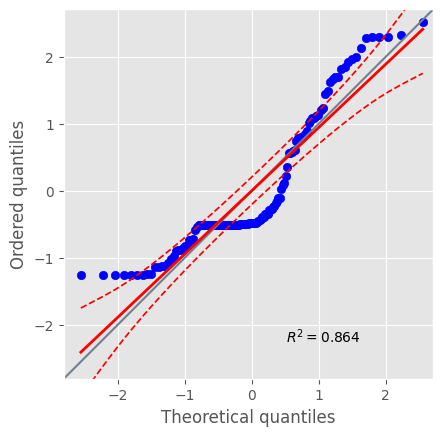

In [ ]:
pg.qqplot(pg.linear_regression(dfr["government"], dfr["returns"]).residuals_)

In [99]:
pg.normality(pg.linear_regression(dfr["government"], dfr["returns"]).residuals_)

,W,pval,normal
0,0.858748,9.461741e-10,False


### Results:

We use tables to help visualize the results of the $t$-tests.

|            | Repatriations |
| ---------- | ------------- |
| Government | Yes           |
| Presidency | No            |
| Senate     | No            |
| House      | No            |

Considering this finding, we expand the analysis for the different types of repatriations:

|            | Government |
| ---------- | ---------- |
| Returns    | Yes        |
| Removals   | No         |
| Expulsions | No         |

Governments which are divided return more undocumented immigrants. More specifically it, this difference is explained by the difference in returns. This means that **governments which are divided return more undocumented immigrants**.

This also means that we accept the null hypothesis regarding our initial research question. Thus we conclude **there is no difference between Democrat and Republican governments regarding deportation rates**.

The regression modelling on the whole dataset corroborates these findings.

When considering a segment of the last 20 years of data, we have complex results (as per the table in the previous section). Much like the literature on the topic, different models point in different directions. The presidency feature points in different directions if considering removals or returns. As such, we would conclude there is, again, **no obvious difference between the party of the president and deportation rates**. However, (**the majority Democrat house seems a good predictor for increased deportation**), explaining around 20% of the variance.

## Conclusion


Regarding our original question, the data we obtained suggests that **there is no diference in deportation between the Democratic and Republican party**. However, if we just consider the last 20 years, there is a correlation between a Democratic house majority and an increase in deportation. While this might be possibly scientifically relevant, a house majority is not what people usually mean when they talk about political parties.

This finding might be either surprising or obvious depending on your political affiliation. Considering how much Trump talks about the issue of undocumented immigrants, one would expect him to be doing something about it. Considering how they act as if they are different parties, one would expect some kind of difference of behaviour between them. We can consider this plausible in light of the comments regarding how the "left-leaning" US party, when considered in the context of other leftist parties, is considerably less radical than its peers.

While this analysis was limited by the amount of test assumptions that were not fulfilled, we can be fairly confident in accepting the null hypothesis for most of the research questions we formulated. The only exception, which was outside the initial scope of the project, was the `government` variable. It represents whether governments are united or divided $-$ that is, if the president's party holds majority in both chambers. It seems that **governments which are divided return more unauthorized immigrants**.

The difference in correlation and causation is especially important here where it is way too easy to say there is a difference. This finding can be used to say things like 'governments should be united', or 'a Democrat house causes more immigration', which would be an incorrect conclusion. The may be many confounding variables: maybe united governments happen in periods of progress or prosperity, or they are united because they have exceptionally good leaders. This simple correlational quantitative analysis might be enlightening in some way, but it is not enough to make grand claims about the political landscape of the US. This can be a good starting point for a more sophisticated analysis, but it does not substitute one.

## References:

-   American Immigration Council. (2024, October 2). Mass deportation: Devastating costs to America, its budget and economy.
-   Chishti, M., & Bush-Joseph, K. (2024, June 27). The Biden Administration Is on Pace to Match Trump Deportation Numbers—Focusing on the Border, Not the U.S. Interior. Migration Policy Institute.
-   Debusmann Jr, B., Halpert, M., & Wendling, M. (2024, November 7). 'It's simple, really' - why Latinos flocked to Trump's working-class coalition. BBC News.
-   Thomas, M., & Wendling, M. (2024, November 16). Trump repeats baseless claim about Haitian immigrants eating pets. BBC News.

(_Disclaimer: AI was use to format the references_)
